Started downloading ...
Data for station with id 50092 for year 2015
Download completed...
Download completed...
Extracting required columns...
END downloading ...
  Station Name SAULT STE MARIE A
0     Province           ONTARIO


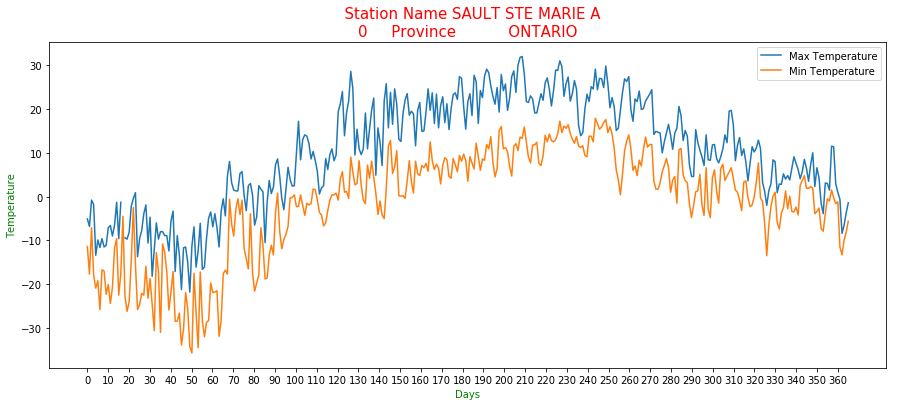

Started downloading ...
Data for station with id 50089 for year 2015
Download completed...
Download completed...
Extracting required columns...
END downloading ...
  Station Name ST. JOHN'S INTL A
0     Province      NEWFOUNDLAND


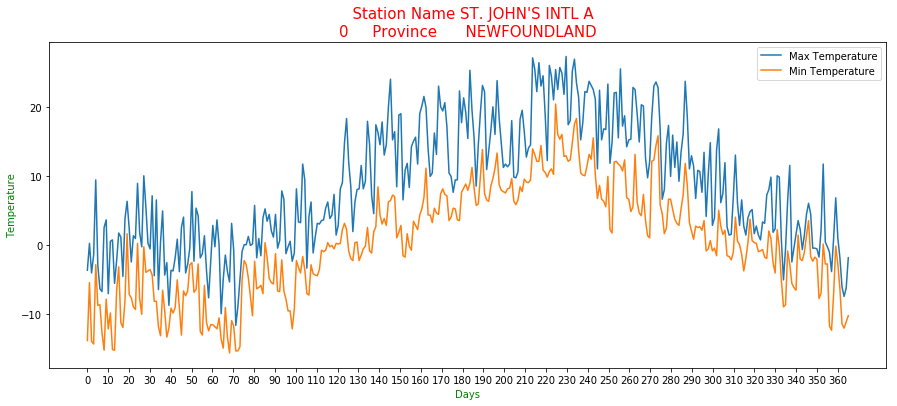

Started downloading ...
Data for station with id 6842 for year 2015
Download completed...
Download completed...
Extracting required columns...
END downloading ...
  Station Name       SPARWOOD CS
0     Province  BRITISH COLUMBIA


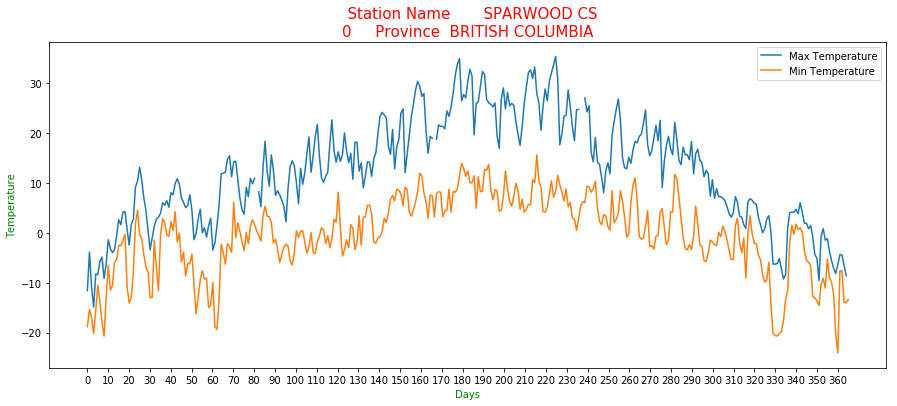

Test successful


In [4]:
import os
import urllib.request
import sys
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline 


def download(stationid, year):
    print("Started downloading ...")
    print("Data for station with id {} for year {}".format(stationid, year))
    
    fname = "{}_{}_t.csv".format(stationid, year)
    url = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID="+str(stationid)+"&Year="+str(year)+"&Month=8&Day=1&timeframe=2&submit=Download+Data"

    try:
        urllib.request.urlretrieve(url, fname)
    except FileNotFoundError as fnfe:
        print("File not found error")
        print("%s" % fnfe)
        return ""
    except Exception as e:
        print("%s" % e)
        return ""
    
    print("Download completed...")
 

    print("Download completed...")
    print("Extracting required columns...")
    
    data_frame = pd.read_csv(fname, skiprows=25, sep=",", encoding="ISO-8859-1")
    columns = [0,1,2,3,5,7,9]
    df = data_frame[columns]
    df_rename = df.rename(columns={'Max Temp (°C)':'Max_Temp', 'Min Temp (°C)': 'Min_Temp', 'Mean Temp (°C)': 'Mean_Temp'})
    print("END downloading ...")
    
    #name
    Citi_name = pd.read_csv(fname, nrows=1)
    
    print(Citi_name)

    fig= plt.figure(num=1, figsize=(15,6))
    x = np.linspace(0,365,365)
    
    y = df_rename['Max Temp (Â°C)']
    y2 = df_rename['Min Temp (Â°C)']
    
    
    plt.plot(x,y,label="Max Temperature")
    plt.plot(x,y2,label="Min Temperature")
    plt.legend(bbox_to_anchor=(1, 1), loc=1)
    plt.xticks(np.arange(0,365,10)) 
    plt.title(Citi_name, color = "red", size = 15)
    plt.xlabel('Days', color = "green")
    plt.ylabel('Temperature',color = "green")
    plt.show()
    
    
stationid1 = 50092
stationid2 = 50089
stationid3 = 6842
year = 2015



#exp = "{}_{}.csv".format(stationid, year)
obs1 = download(stationid1, year)
obs2 = download(stationid2, year)
obs3 = download(stationid3, year)
#! touch 50089_2016_t.csv
#assert_equal(exp, obs)
print("Test successful")